**EDA CLASS ASSIGNMENT**

**GROUP 22**

**TOPIC:** Sklearn

**GROUP MEMBERS:**

> Aniket Pandey (202411001)


> Bhavya Boda (202203067)


> Krishil Jayswal (202203040)

### Step 1: Importing Required Libraries and Loading the Dataset

In this step, we will import the necessary libraries for our machine learning workflow. These include:
- **pandas**: For data manipulation and loading custom datasets.
- **scikit-learn sublibraries**: For preprocessing, model training, and evaluation.

We will also load the dataset to get an overview of the data we are working with.

In [2]:
# Importing the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
# Loading the Data from Github.
df = pd.read_csv('https://raw.githubusercontent.com/Krishil-Jayswal/Exploratory-Data-Analysis/refs/heads/main/missingno%20Package/car_prices.csv')

### Step 2: Exploring the Data

In this step, we will explore the dataset to gain a better understanding of its structure and characteristics. This involves:
- Checking the shape of the dataset (number of samples and features).
- Viewing the data types and basic information.
- Generating statistical summaries to understand feature distributions.
- Identifying any missing values or anomalies.


In [4]:
# Getting the insights about rows.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# Getting the dimension of dataset.
df.shape

(558837, 16)

In [6]:
# Getting the data types of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
# Getting the list of columns.
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [8]:
# Counting the null values.
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

By doing the above exploration, we come to the conclusion that our dataset contains of both numeric and categorical data. And also there are missing values in it. So our next step will be data preprocessing.

### Step 3: Data Preprocessing

Data preprocessing is a crucial step to ensure that our dataset is ready for training a machine learning model. This includes:
- **Scaling**: Standardizing the numerical features to ensure that all features contribute equally to the model.
- **Encoding**: Converting categorical data into numerical values so that machine learning algorithms can process them.
- **Handling Missing Values**: Ensuring there are no missing values that can interfere with training.

We will use `StandardScaler` from `scikit-learn` to standardize the numerical features, and if there were any categorical variables, we would encode them using `LabelEncoder` or `OneHotEncoder`.


In [9]:
# Removing the features that are not useful to us for selling price prediction.
# Because 'vin' is just a random generated id and 'saledate' doesn't make much sense.

df2 = df.drop(columns = ['vin', 'saledate'])
df2.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


### Handling Missing Values

Missing values are a common occurrence in real-world datasets and can adversely affect the performance of machine learning models. They can lead to biased estimates, reduced statistical power, and may cause algorithms to fail if they encounter `NaN` values. In this step, we will identify, analyze, and impute missing values to ensure a complete dataset for training our model.

We can use techniques such as:

- **Identifying Missing Values**: 
  Use functions like `isnull()` and `sum()` to check for missing values in each feature of the dataset. This allows us to understand the extent of missing data and plan our imputation strategy.

  ```python
  missing_values = data.isnull().sum()  # Count of missing values in each column


In [10]:
df2.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

In [11]:
## Defining the target variable (sellingprice) and feature set.

X = df2.drop(columns = ['sellingprice']) # Features
y = df2['sellingprice'] # Target

In [12]:
# Filling the missing values with mean value.
y = y.fillna(y.mean())

# Check the mean and median of the target feature to get a basic idea of how much the mean absolute error should be.
print(f'Mean selling price: {y.mean()}')
print(f'Median selling price: {y.median()}')

Mean selling price: 13611.358810003136
Median selling price: 12100.0


Now for the input feature data, we will define the pipeline to do the handling of missing values and encodeing of categorical features. We will discuss later why we used the pipeline instead of doing it manually.

In [13]:
# Identifying numerical and categorical features.

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [14]:
# Handling missing values and create preprocessing pipelines.

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean.
    ('scaler', StandardScaler())])  							# Scale numerical features.

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value.
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 	 # Convert categorical features to one-hot encoding.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Why have we used Imputer and Pipeline?

> ### **Imputer (SimpleImputer):**

The SimpleImputer is used to handle missing values in the dataset. Missing values can cause problems during model training since many algorithms can't handle NaN (Not a Number) values. Here’s how we use it:

For numerical features, the SimpleImputer replaces missing values with the mean of the column.

For categorical features, it replaces missing values with the most frequent (mode) value of the column.

Handling missing values ensures that the model has complete data to work with, preventing errors during training and making predictions.

> ### **Pipeline:**

A Pipeline allows us to chain together multiple steps of data preprocessing and model training into a single workflow. It ensures that each step is applied in sequence every time you fit the model or make predictions.

In this case, we combined the following steps in the pipeline:

Imputation (SimpleImputer): Deals with missing values.

Scaling (StandardScaler): Standardizes the numerical data.

Encoding (OneHotEncoder): Converts categorical variables into numerical format.

Modeling (LinearRegression): Fits the linear regression model to the preprocessed data.

The benefit of using a Pipeline:

Efficiency: It streamlines the entire data preparation and modeling process, ensuring the same transformations are applied to both training and test data.

Simplicity: You don’t need to manually preprocess your data each time; it’s automatically handled in the pipeline.

Consistency: Ensures that the preprocessing steps are applied in the exact same way during both training and testing, avoiding data leakage and errors.

### Step 4: Model Building, Performance Evaluation and Predictions

In this step, we will build a machine learning model to predict the selling price of vehicles based on various features. We'll use a regression model, train it with the training dataset, and evaluate its performance using the testing dataset.

#### **Train-Test Split**

In [15]:
# Splitting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Using the Linear Regression Model**

In [16]:
## Creating a pipeline with the preprocessor and linear regression model
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

## Training the linear regression model
lr_model.fit(X_train, y_train)

## Making predictions and evaluate the model
lr_y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, lr_y_pred)

print(f'Linear Regression Mean Absolute Error: {mae}')
print(f'Linear Regression R-squared Score: {r2_score(y_test, lr_y_pred)}')
print(f'Linear Regression Mean Absolute Error/ Mean percentage:' , (mae/y.mean())*100)
print(f'Linear Regression Median Absolute Error/ Median percentage:' , (mae/y.median())*100)

Mean Absolute Error: 976.4984622345135
R-squared Score: 0.9746561634637404
Mean Absolute Error/ Mean percentage: 7.174143859295475
Median Absolute Error/ Median percentage: 8.070235225078623


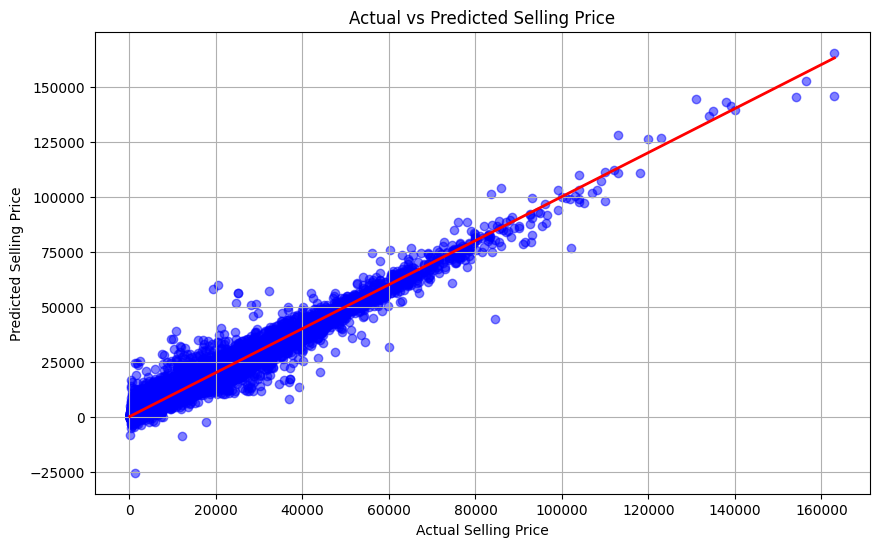

In [19]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, lr_y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

#### **Using the Random Forest Model**

In [17]:
# Creating a pipeline with the preprocessor and Random Forest model.

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))  # Reduced n_estimators and max_depth
])

# Using samples for reducing the time for training.
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.sample(frac=0.2, random_state=42)

# Training the Random Forest model.
rf_model.fit(X_train_sample, y_train_sample)

# Making predictions and evaluating the model.
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print(f'Random Forest Mean Absolute Error: {rf_mae}')
print(f'Random Forest R-squared Score: {r2_score(y_test, rf_y_pred)}')
print(f'Random Forest Mean Absolute Error / Mean percentage: {(rf_mae / y.mean()) * 100}')
print(f'Random Forest Median Absolute Error / Median percentage: {(rf_mae / y.median()) * 100}')

Random Forest Mean Absolute Error: 971.7634250194152
Random Forest R-squared Score: 0.974690466863972
Random Forest Mean Absolute Error / Mean percentage: 7.139356463847355
Random Forest Mean Absolute Error / Median percentage: 8.03110268611087


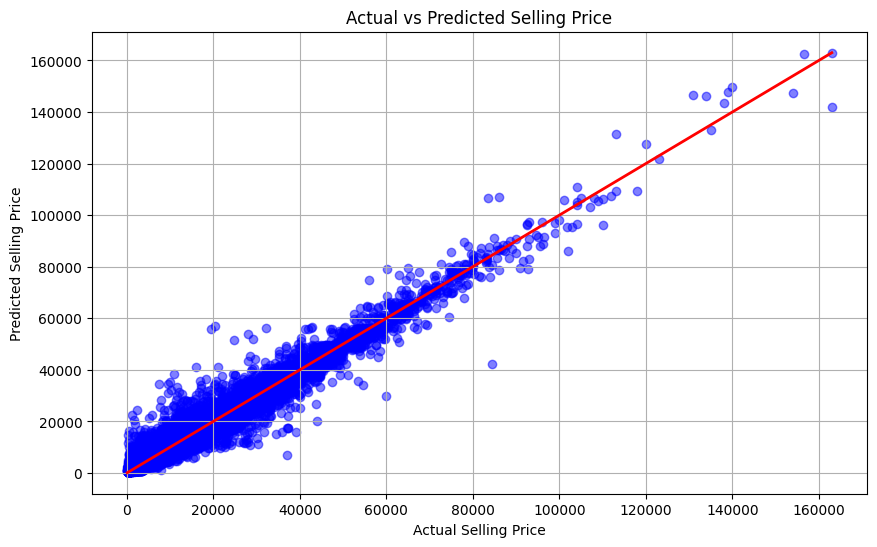

In [21]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()

### Step 5: Conclusion

As we can see, the performance of both the model fitting (Linear Regression and Random Forest) are nearly the same. However, we can see slightly higher performance in Random Forest by increasing the train size sample but it will be very computational intensive task. So as for now we can take either model for prediction and for a specific usecase it depends on trade off between computation and performance. 